# A. Importing Library dan dataset

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.preprocessing import StandardScaler
#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("Train.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# B. Exploratory Data Analysis

#### Encoding With Label Encoder

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [5]:
comm= df.copy()
for col in comm.select_dtypes(include='O').columns:
    comm[col]=le.fit_transform(comm[col])

In [6]:
comm.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [7]:
comm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  int64
 2   Mode_of_Shipment     10999 non-null  int64
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  int64
 8   Gender               10999 non-null  int64
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
 11  Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(12)
memory usage: 1.0 MB


## 1. Statistics Descriptive

In [8]:
def summary(df,column):
    print("Distinct : ",len(pd.unique(df[column])))
    print("Missing : ",df[column].isnull().sum())
    print("Sum : ",df[column].sum())
    print("Mode : ",st.mode(df[column]))
    print("stddev : ",np.std(df[column]))
    print("CV :",100*(np.std(df[column]))/(np.mean(df[column]))) #coefficient of variation
    print("Min : ",df[column].min())
    print("Max : ",df[column].max())
    print("Mean : ",df[column].mean())
    print("Q1 : ",np.quantile(df[column],0.25))
    print("Q1 : ",np.quantile(df[column],0.5))
    print("Q1 : ",np.quantile(df[column],0.75))
    
    
def values(df,column):
    for i in df[column].unique():
        print(i)


def values_df(df):
    for i in df.columns:
        print(i)
        for j in df[i].unique():
            print(j)
        print("-"*20)
        
def proportion(df,column):
    for i in df[column].unique():
        counts = (sum(df[column]==i)/df[column].count()) *100
        print (i,' dengan proporsi {}%'.format(counts))

#### Let's see a brief statistical description of the data

In [9]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


#### Or it can be seen from the encoded data:

In [10]:
comm.describe()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,2.333394,1.516865,4.054459,2.990545,210.196836,3.567597,1.346031,0.495863,13.373216,3634.016729,0.596691
std,3175.28214,1.490726,0.756894,1.141490,1.413603,48.063272,1.522860,0.631434,0.500006,16.205527,1635.377251,0.490584
min,1.00000,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,2750.50000,1.000000,1.000000,3.000000,2.000000,169.000000,3.000000,1.000000,0.000000,4.000000,1839.500000,0.000000
50%,5500.00000,3.000000,2.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,8249.50000,4.000000,2.000000,5.000000,4.000000,251.000000,4.000000,2.000000,1.000000,10.000000,5050.000000,1.000000
max,10999.00000,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000


In [11]:
for i in comm.columns:
    print (i,'\n')
    summary(comm,i)
    print("-"*30)

ID 

Distinct :  10999
Missing :  0
Sum :  60494500
Mode :  1
stddev :  3175.1377922855568
CV : 57.729778041555576
Min :  1
Max :  10999
Mean :  5500.0
Q1 :  2750.5
Q1 :  5500.0
Q1 :  8249.5
------------------------------
Warehouse_block 

Distinct :  5
Missing :  0
Sum :  25665
Mode :  4
stddev :  1.490657770144777
CV : 63.88367353914827
Min :  0
Max :  4
Mean :  2.333393944904082
Q1 :  1.0
Q1 :  3.0
Q1 :  4.0
------------------------------
Mode_of_Shipment 

Distinct :  3
Missing :  0
Sum :  16684
Mode :  2
stddev :  0.7568592007222695
CV : 49.89627396753921
Min :  0
Max :  2
Mean :  1.5168651695608693
Q1 :  1.0
Q1 :  2.0
Q1 :  2.0
------------------------------
Customer_care_calls 

Distinct :  6
Missing :  0
Sum :  44595
Mode :  4
stddev :  1.141437755315412
CV : 28.15264911024603
Min :  2
Max :  7
Mean :  4.054459496317847
Q1 :  3.0
Q1 :  4.0
Q1 :  5.0
------------------------------
Customer_rating 

Distinct :  5
Missing :  0
Sum :  32893
Mode :  3
stddev :  1.4135389093311672
CV

## 2. Imbalanced Dataset Checking (Checking Target Class Proportion)

#### We see our target value distribution

In [12]:
proportion(comm,'Reached.on.Time_Y.N')

1  dengan proporsi 59.66906082371125%
0  dengan proporsi 40.33093917628875%


#### It can be seen that the proportion or amount of data for each target class that we have is not too much different in number, so it is enough to avoid the problem of imbalanced datasets

# C. Data Visualization

## 1. Correlation Between Features In Data

### Let's see the heatmap correlation in the initial data

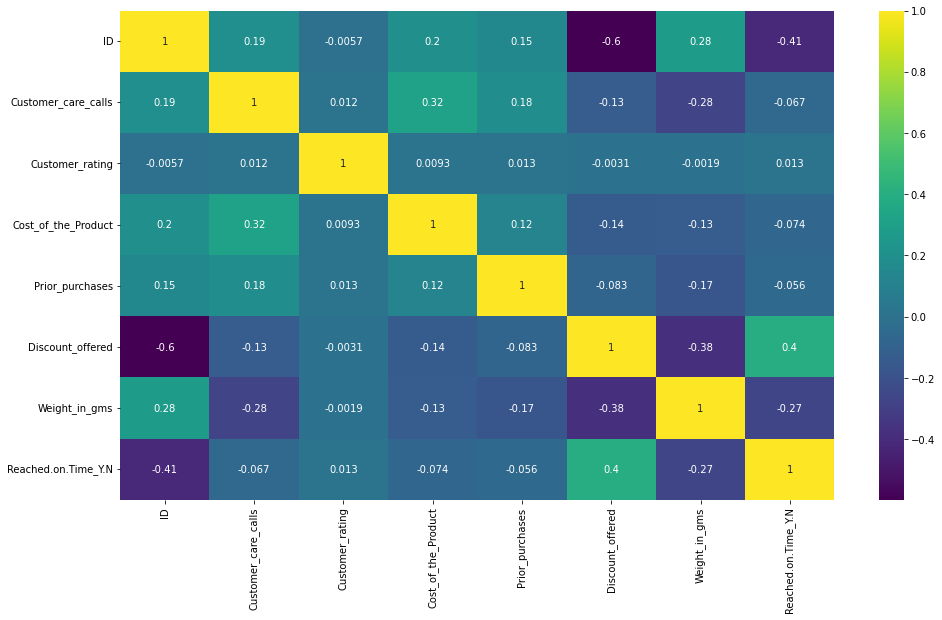

In [13]:
plt.figure(figsize=(16,9))
x = df.drop(['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'],axis = 1)
ax = sns.heatmap(df.corr(),annot = True,cmap = 'viridis')
plt.show()

### Now let's try also on the data that has been encoded

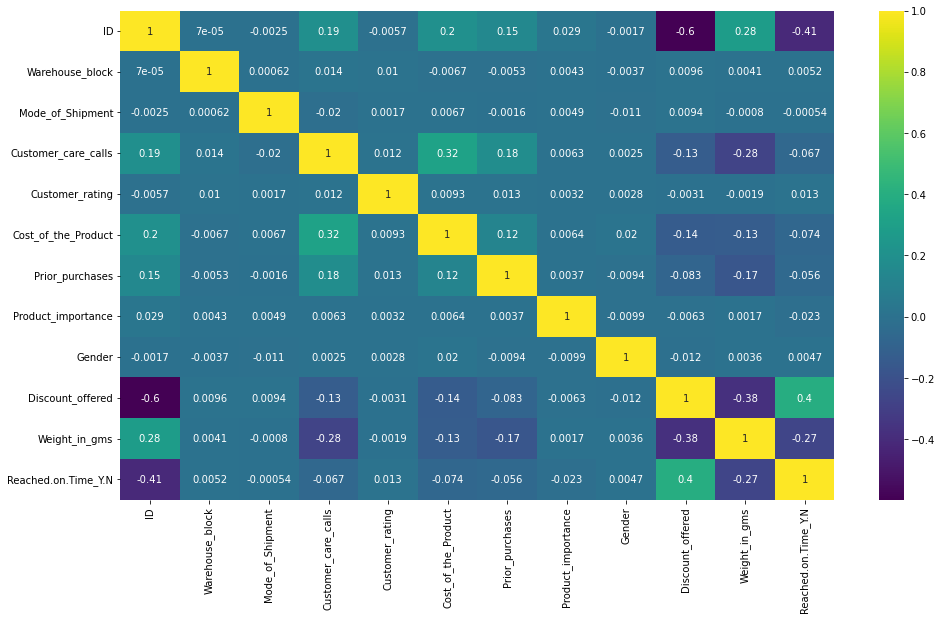

In [14]:
plt.figure(figsize=(16,9))
x = comm
ax = sns.heatmap(comm.corr(),annot = True,cmap = 'viridis')
plt.show()

### It can be seen that each feature in the data does not have a significant correlation in our target column, namely "Reached.on.Time_YN"

### The discount_offered feature has the largest correlation, which is 0.4 in the "Reached.on.Time_YN" feature, but this value does not show a strong enough correlation between the two features.

## 2. Basic Visualization

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


### 2.1. Warehouse_block Feature

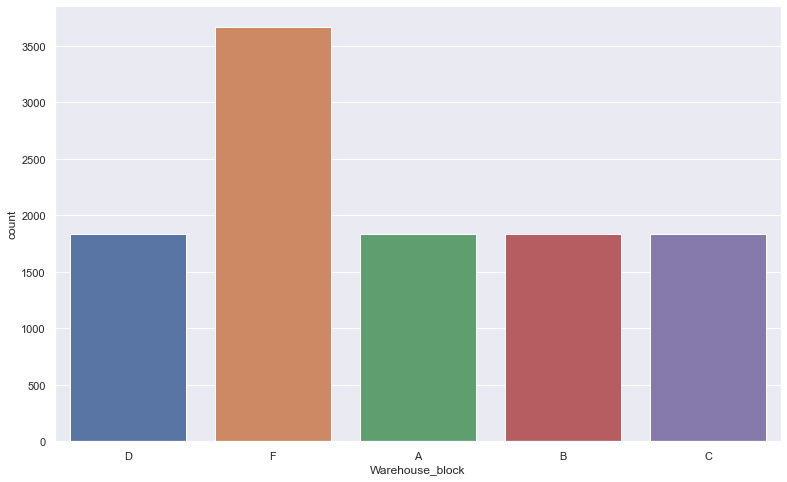

In [16]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='Warehouse_block',data=df)

<Figure size 1440x576 with 0 Axes>

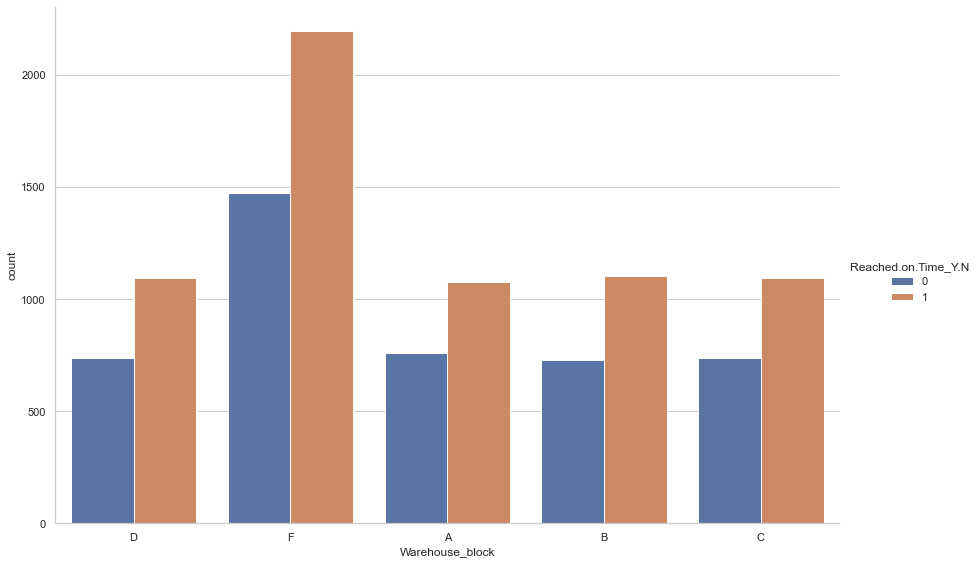

In [17]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Warehouse_block',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.2. Mode_of_Shipment Feature

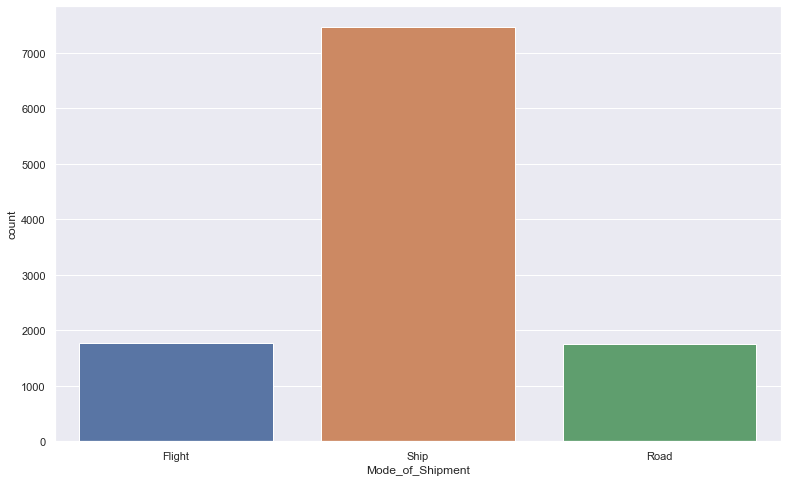

In [18]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='Mode_of_Shipment',data=df)

<Figure size 1440x576 with 0 Axes>

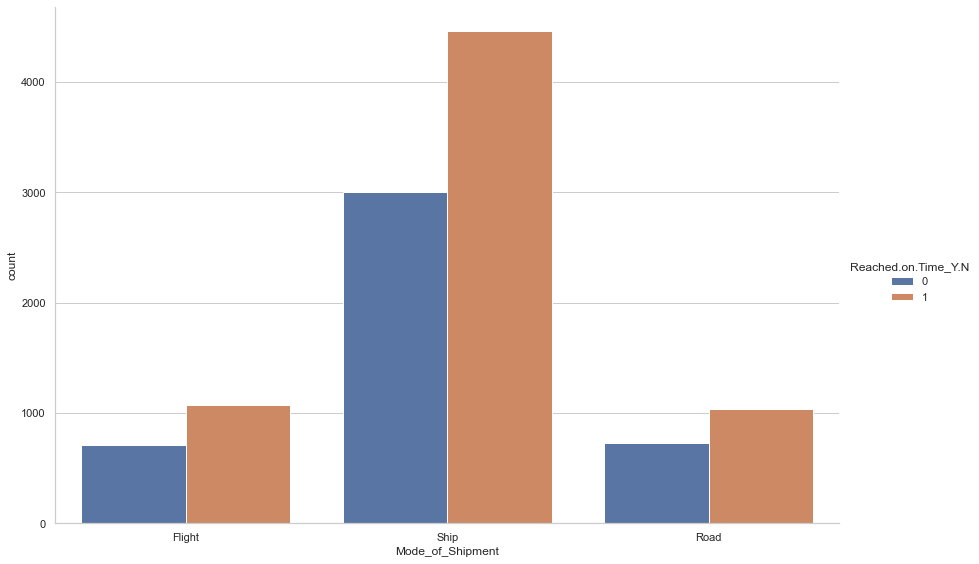

In [19]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Mode_of_Shipment',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.3. Customer_care_calls Feature

<Figure size 1440x576 with 0 Axes>

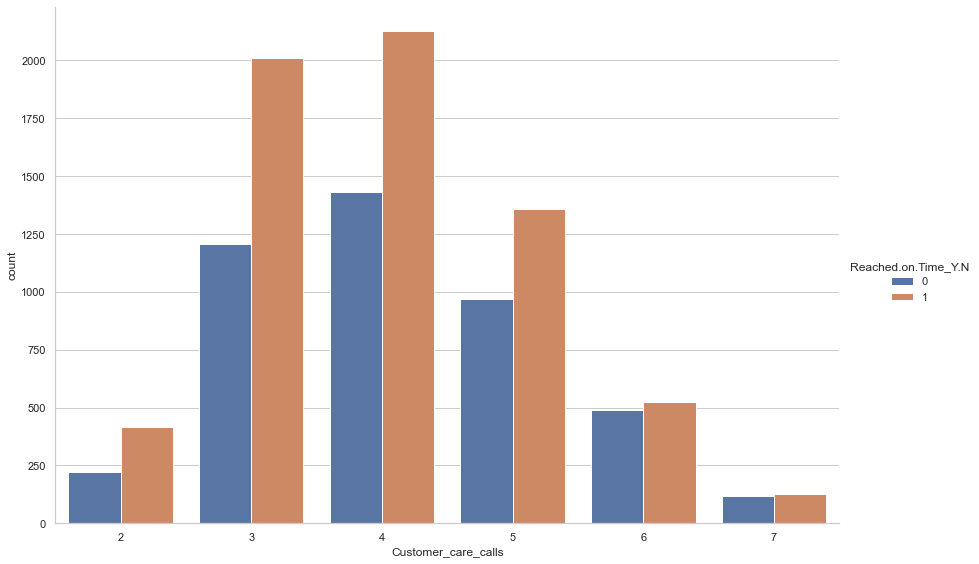

In [20]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Customer_care_calls',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.4. Customer_rating Feature

<Figure size 1440x576 with 0 Axes>

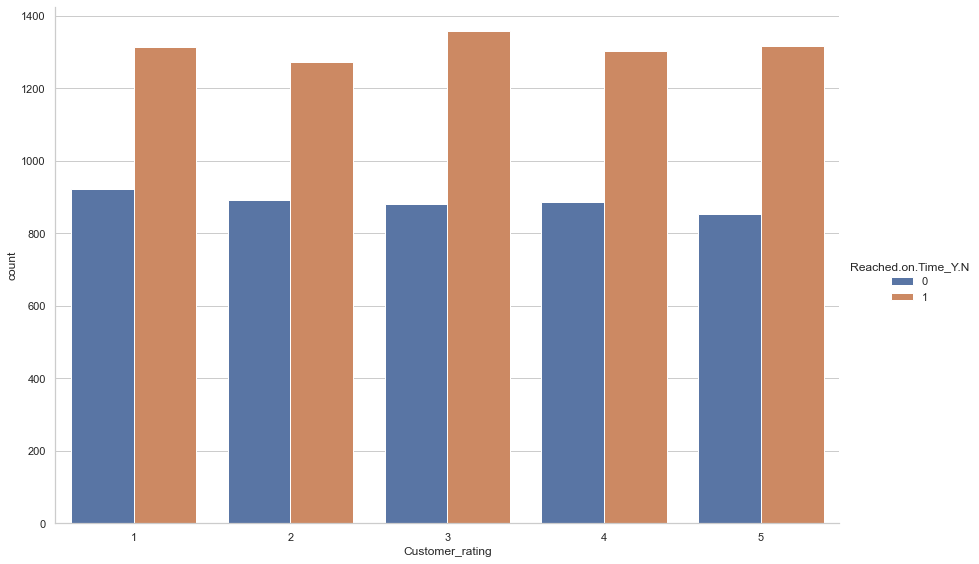

In [21]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Customer_rating',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.5. Cost_of_the_Product Feature

<AxesSubplot:xlabel='Cost_of_the_Product', ylabel='Count'>

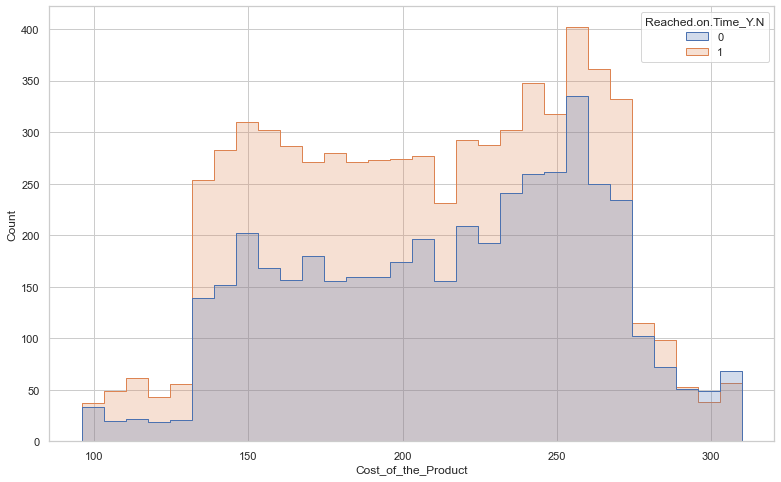

In [22]:
sns.histplot(data=df, x="Cost_of_the_Product",hue="Reached.on.Time_Y.N",element="step")

### 2.6. Prior_purchases Feature

<Figure size 1440x576 with 0 Axes>

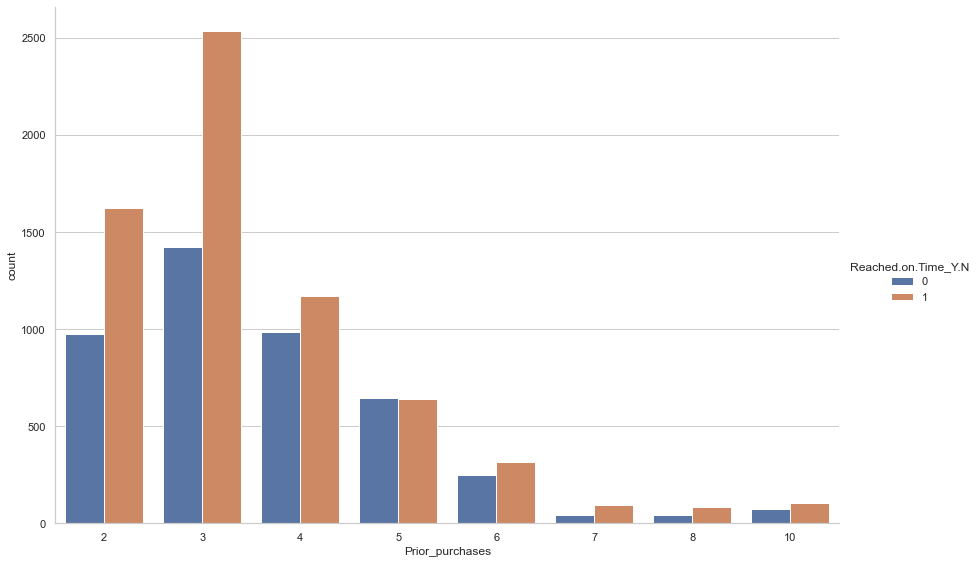

In [23]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Prior_purchases',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.7. Product_importance Feature

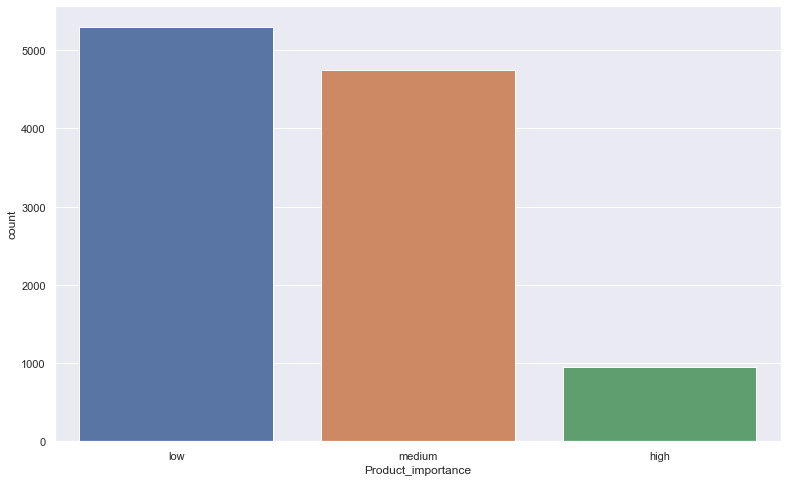

In [24]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='Product_importance',data=df)

<Figure size 1440x576 with 0 Axes>

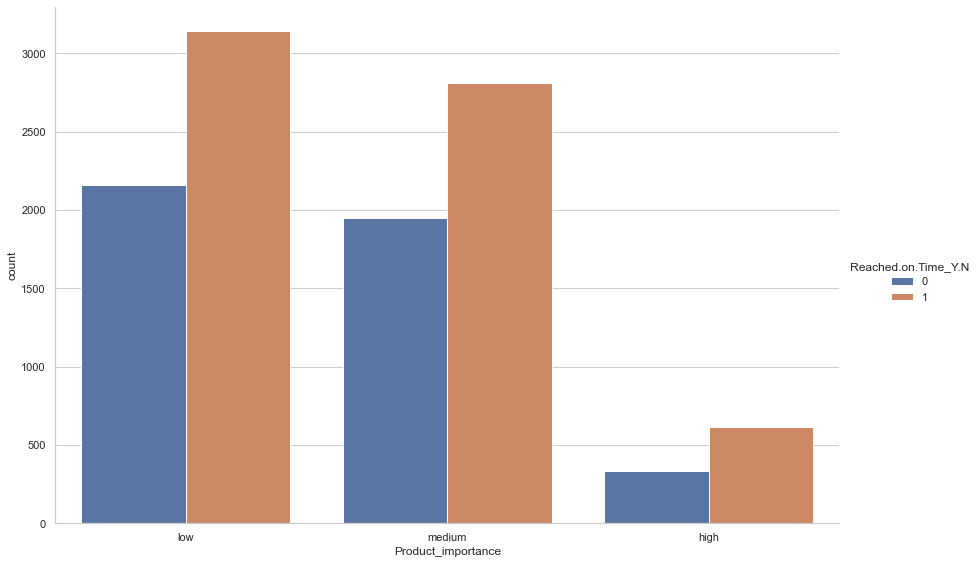

In [25]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Product_importance',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.8. Gender Feature

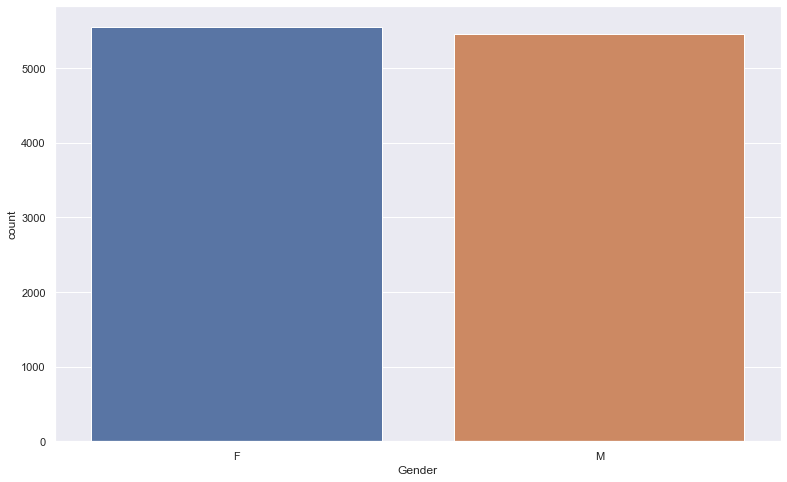

In [26]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='Gender',data=df)

<Figure size 1440x576 with 0 Axes>

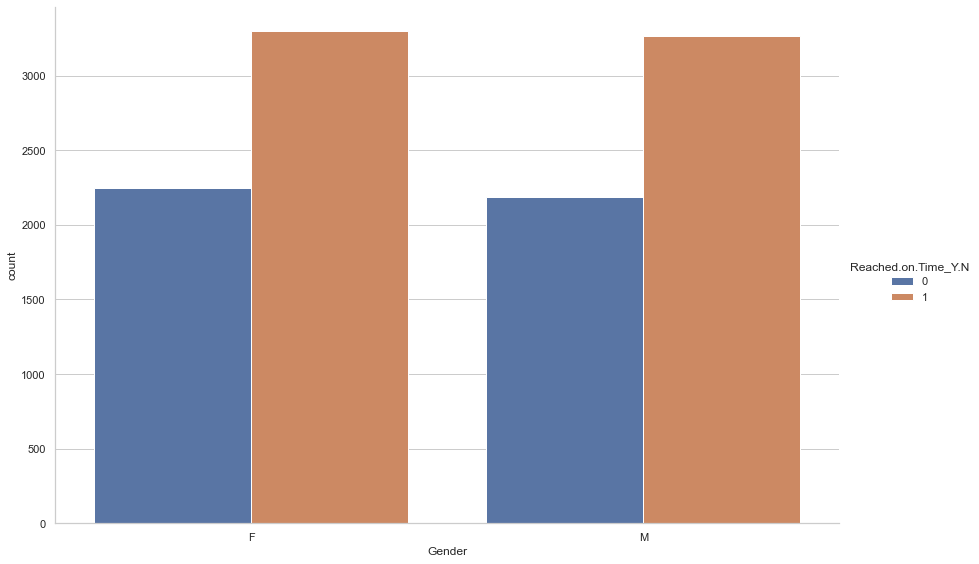

In [27]:
sns.set_theme(style="whitegrid")
plt.figure(figsize = (20,8))
sns.catplot(x='Gender',hue='Reached.on.Time_Y.N',data=df,kind="count",height=8, aspect=1.5)

### 2.9. Discount_offered Feature

<AxesSubplot:xlabel='Discount_offered', ylabel='Count'>

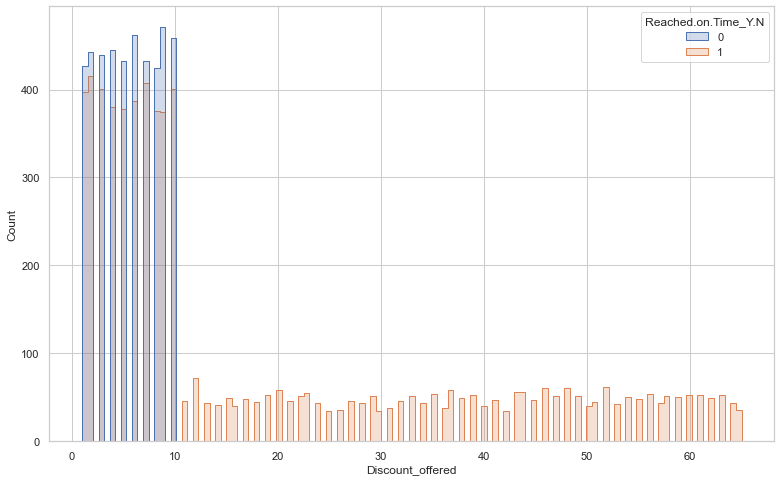

In [28]:
sns.histplot(data=df, x="Discount_offered",hue="Reached.on.Time_Y.N",element="step")

### 2.10. Weight_in_gms Feature

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Count'>

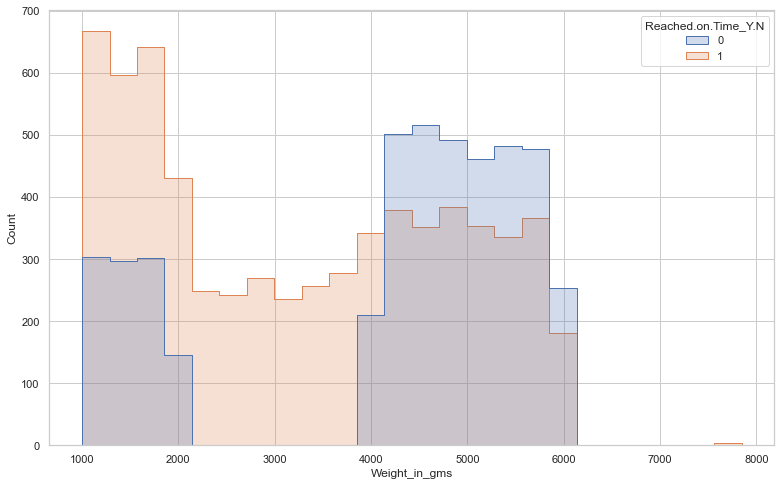

In [29]:
sns.histplot(data=df, x="Weight_in_gms",hue="Reached.on.Time_Y.N",element="step")

### 2.11. Reached on Time Feature

### We want to check how our target data is distributed

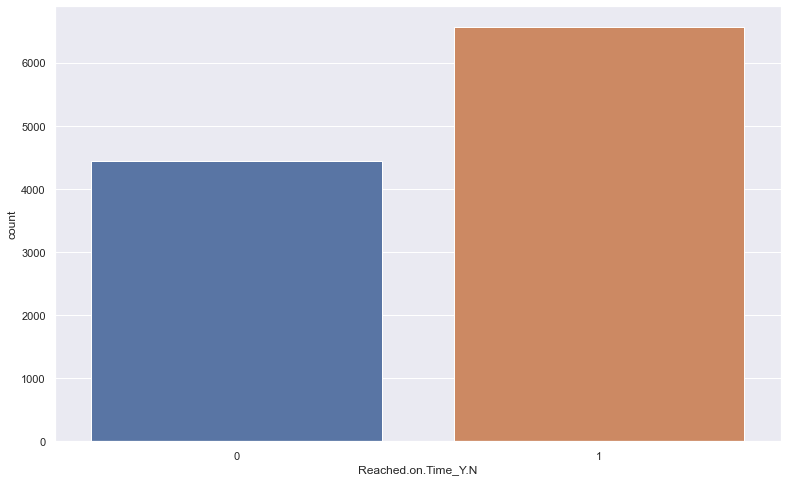

In [30]:
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(13,8)})
ax = sns.countplot(x='Reached.on.Time_Y.N',data=df)

### Seems that our target data is a little bit imbalanced. Reached.on.Time_Y.N feature has more positive value (1) than negative value (0).

# D. Data Cleaning and Preprocessing

## 1. Missing Value Handling

In [31]:
df.isnull().any()

ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Reached.on.Time_Y.N    False
dtype: bool

#### No missing value in our data

## 2. Removing Unnecessary Feature

In [32]:
df = df.drop(["ID"],axis=1)

In [33]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## 3. Checking For Outlier

In [34]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


### From the statistical description of the data, the "Weight_in_gms" feature looks a little suspicious, we will check whether there are outliers in these features.

### We check for outliers using the Interquartile Range (IQR).

In [35]:
Q12 = df['Weight_in_gms'].quantile(0.25)
Q32 = df['Weight_in_gms'].quantile(0.75)
IQR = Q32-Q12

In [36]:
df[df['Weight_in_gms']>(Q32+(1.5*IQR))]

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


### It seems that no outliers are detected in the Weight_in_gms data feature

## 4. Encoding

### We have to encode our data so it can be processed in machine learning model

In [37]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [38]:
df_onehot=df.copy()
for col in df_onehot.select_dtypes(include='O').columns:
    df_onehot=one_hot_encoder(df_onehot,col)
    
df_onehot.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0


## 5. Feature Scaling

### We see that our data values have different ranges. We need to do some feature scaling so they have same ranges. We don't want our ML model detects feature that has bigger value range as a dominant feature that impacts more to our target value.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_onehot.drop('Reached.on.Time_Y.N',axis = 1),df_onehot['Reached.on.Time_Y.N'],test_size = 0.2,random_state = 0)



In [40]:
scaler = StandardScaler()
scaler.fit(X_train,y_train)

StandardScaler()

In [41]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# E. Machine Learning Modelling

# E.1. Basic Models

## 1. K-Nearest Neighbors Model

In [42]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
ypred_knn = knn_model.predict(X_test)
ypred_knn

array([0, 0, 0, ..., 1, 1, 0])

In [44]:
print(classification_report(y_test,ypred_knn))

              precision    recall  f1-score   support

           0       0.54      0.57      0.55       908
           1       0.68      0.66      0.67      1292

    accuracy                           0.62      2200
   macro avg       0.61      0.61      0.61      2200
weighted avg       0.62      0.62      0.62      2200



In [45]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test,ypred)
    print('TN - True Negative {}'.format(cfmat[0,0]))
    print('FP - False Positive {}'.format(cfmat[0,1]))
    print('FN - False Negative {}'.format(cfmat[1,0]))
    print('TP - True Positive {}'.format(cfmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))

In [46]:
Confusion_Matrix(y_test,ypred_knn)

TN - True Negative 514
FP - False Positive 394
FN - False Negative 440
TP - True Positive 852
Accuracy Rate: 0.6209090909090909
Misclassification Rate: 0.3790909090909091


## 2. Decision Tree Model

In [47]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
ypred_dt = dt_model.predict(X_test)
ypred_dt

array([1, 1, 1, ..., 0, 0, 1])

In [49]:
print(classification_report(y_test,ypred_dt))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55       908
           1       0.68      0.71      0.70      1292

    accuracy                           0.64      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.63      0.64      0.63      2200



In [50]:
Confusion_Matrix(y_test,ypred_dt)

TN - True Negative 487
FP - False Positive 421
FN - False Negative 379
TP - True Positive 913
Accuracy Rate: 0.6363636363636364
Misclassification Rate: 0.36363636363636365


## 3. Logistic Regression Model

In [51]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train,y_train)

LogisticRegression()

In [52]:
ypred_logreg = model_logreg.predict(X_test)
ypred_logreg

array([0, 0, 1, ..., 0, 1, 1])

In [53]:
print(classification_report(y_test,ypred_logreg))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       908
           1       0.69      0.68      0.69      1292

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



In [54]:
Confusion_Matrix(y_test,ypred_logreg)

TN - True Negative 523
FP - False Positive 385
FN - False Negative 417
TP - True Positive 875
Accuracy Rate: 0.6354545454545455
Misclassification Rate: 0.36454545454545456


## 4. Random Forest Model

In [55]:
model_forest = RandomForestClassifier()
model_forest.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
ypred_forest = model_forest.predict(X_test)
ypred_forest

array([0, 0, 1, ..., 1, 1, 0])

In [57]:
print(classification_report(y_test,ypred_forest))

              precision    recall  f1-score   support

           0       0.58      0.67      0.62       908
           1       0.74      0.66      0.69      1292

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.66      0.66      2200



In [58]:
Confusion_Matrix(y_test,ypred_forest)

TN - True Negative 604
FP - False Positive 304
FN - False Negative 445
TP - True Positive 847
Accuracy Rate: 0.6595454545454545
Misclassification Rate: 0.34045454545454545


### The accuracy of our model is getting better. But the accuracy we have is still in the range of 60-70%. 

### Now i will try to do some hyperparameter tuning using gridsearch cross validation to search best hyperparameters for our models so that we can get higher accuracy.

# E.2. GridSearch CV Models